In [1]:
import io
import tskit

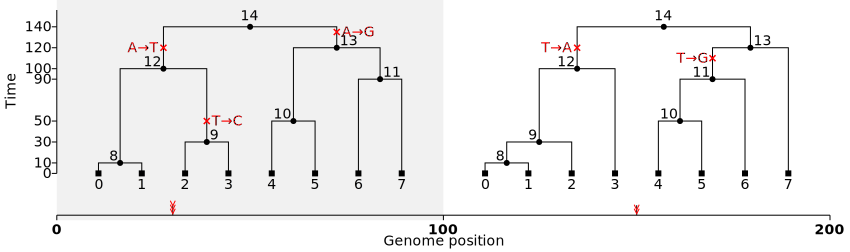

In [77]:
nodes = """\
id  is_sample time population
0   1         0    -1
1   1         0    -1
2   1         0    -1
3   1         0    -1
4   1         0    -1
5   1         0    -1
6   1         0    -1
7   1         0    -1
8   0         10   -1
9   0         30   -1
10  0         50   -1
11  0         90   -1
12  0         100  -1
13  0         120  -1
13  0         140  -1
"""

edges = """\
left right parent child
0    100   8      0,1
0    100   9      2,3
0    100   10     4,5
0    100   11     6,7
0    100   12     8,9
0    100   13     10,11
0    100   14     12,13
100  200   8      0,1
100  200   9      2,8
100  200   10     4,5
100  200   11     6,10
100  200   12     3,9
100  200   13     7,11
100  200   14     12,13
"""

sites = """\
position ancestral_state
30       A
150      T
"""

mutations = """\
site node derived_state parent time
0    12   T             -1     120
0    13   G             -1     135
0    9    C             0      50
1    12   A             -1     120
1    11   G             -1     110
"""

ts = tskit.load_text(
    nodes=io.StringIO(nodes),
    edges=io.StringIO(edges),
    sites=io.StringIO(sites),
    mutations=io.StringIO(mutations),
    strict=False,
)

mut_labels = {}  # An array of labels for the mutations
for mut in ts.mutations():  # Make pretty labels showing the change in state
    site = ts.site(mut.site)
    older_mut = mut.parent >= 0  # is there an older mutation at the same position?
    prev = ts.mutation(mut.parent).derived_state if older_mut else site.ancestral_state
    mut_labels[mut.id] = f"{prev}→{mut.derived_state}"

ts.draw_svg(
    'figure1.svg',
    size=(1000 * .85, 300 * .84),
    mutation_labels=mut_labels,
    y_axis=True,
)

In [78]:
# 2, 2, 3, 3, 1, 1, 1, 1
# 1, 1, 1, 1, 2, 2, 2, 0